In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from scipy.stats import skew, kurtosis
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import statistics
%matplotlib inline


# Read Data

In [136]:
data=pd.read_csv("/kaggle/input/nutritions-us-new/Nutritions_US_new.csv")

# Font Path

In [137]:
my_font = '/kaggle/input/hack-font/Hack-Bold.ttf' 

In [138]:
data.head()

,Unnamed: 0,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),...,Vit_D_IU,Vit_K_(�g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2
0,0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,...,0.0,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp
1,1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,...,0.0,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp
2,2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,...,0.0,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup
3,3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,...,21.0,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch
4,4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,...,22.0,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded"


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 53 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         8790 non-null   int64  
 1   NDB_No             8790 non-null   int64  
 2   Shrt_Desc          8790 non-null   object 
 3   Water_(g)          8790 non-null   float64
 4   Energ_Kcal         8790 non-null   int64  
 5   Protein_(g)        8790 non-null   float64
 6   Lipid_Tot_(g)      8790 non-null   float64
 7   Ash_(g)            8790 non-null   float64
 8   Carbohydrt_(g)     8790 non-null   float64
 9   Fiber_TD_(g)       8790 non-null   float64
 10  Sugar_Tot_(g)      8790 non-null   float64
 11  Calcium_(mg)       8790 non-null   float64
 12  Iron_(mg)          8790 non-null   float64
 13  Magnesium_(mg)     8790 non-null   float64
 14  Phosphorus_(mg)    8790 non-null   float64
 15  Potassium_(mg)     8790 non-null   float64
 16  Sodium_(mg)        8790 

In [140]:
data.describe()

,Unnamed: 0,NDB_No,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_E_(mg),Vit_D_�g,Vit_D_IU,Vit_K_(�g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_2
count,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,...,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000
mean,4394.500000,15663.495222,54.112218,226.317634,11.342849,10.553725,1.783468,22.127710,2.187445,8.543066,...,1.331518,0.579269,22.990142,15.631586,3.576334,4.081006,2.288767,40.613246,96.395130,250.747668
std,2537.598767,9251.413586,30.771103,169.877539,10.530474,15.814842,2.948533,27.270822,4.232431,13.277479,...,3.802247,3.078996,123.174170,61.649376,6.388101,6.739902,5.014458,117.040075,82.885203,283.175074
min,0.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.400000
25%,2197.250000,9086.250000,29.717500,91.000000,2.380000,0.950000,0.870000,0.050000,0.000000,0.090000,...,0.200000,0.000000,0.000000,1.300000,0.259000,0.304000,0.249000,0.000000,29.400000,140.000000
50%,4394.500000,14427.500000,63.080000,191.000000,8.000000,5.140000,1.230000,9.340000,1.000000,4.220000,...,0.770000,0.300000,10.000000,10.100000,1.740000,2.293500,0.813500,6.000000,85.000000,250.747668
75%,6591.750000,20142.750000,77.960000,337.000000,19.880000,13.720000,2.020000,34.910000,2.400000,8.543066,...,1.331518,0.579269,22.990142,15.631586,4.173750,4.759000,2.288767,65.000000,128.000000,250.747668
max,8789.000000,93600.000000,100.000000,902.000000,88.320000,100.000000,99.800000,100.000000,79.000000,99.800000,...,149.400000,250.000000,10000.000000,1714.500000,95.600000,83.689000,74.623000,3100.000000,1184.000000,5717.000000


# Task 1

# a. How many categorical and numerical data are here?

### There are 3 categorical features and 50 numerical features

In [141]:
data.dtypes.value_counts()

float64    47
int64       3
object      3
dtype: int64

In [142]:
numeric_data = data.select_dtypes(include=[np.number])

In [143]:
numeric_data.head()

,Unnamed: 0,NDB_No,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_E_(mg),Vit_D_�g,Vit_D_IU,Vit_K_(�g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_2
0,0,1001,15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,2.32,0.0,0.0,7.0,51.368,21.021,3.043,215.0,5.00,14.2
1,1,1002,16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,...,1.37,0.0,0.0,4.6,45.390,19.874,3.331,225.0,3.80,9.4
2,2,1003,0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,2.80,0.0,0.0,8.6,61.924,28.732,3.694,256.0,12.80,205.0
3,3,1004,42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,0.25,0.5,21.0,2.4,18.669,7.778,0.800,75.0,28.35,17.0
4,4,1005,41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,0.26,0.5,22.0,2.5,18.764,8.598,0.784,94.0,132.00,113.0


In [144]:
categorical_data = data.select_dtypes(exclude=[np.number])

In [145]:
categorical_data.head()

,Shrt_Desc,GmWt_Desc1,GmWt_Desc2
0,"BUTTER,WITH SALT","1 pat, (1"" sq, 1/3"" high)",1 tbsp
1,"BUTTER,WHIPPED,W/ SALT","1 pat, (1"" sq, 1/3"" high)",1 tbsp
2,"BUTTER OIL,ANHYDROUS",1 tbsp,1 cup
3,"CHEESE,BLUE",1 oz,1 cubic inch
4,"CHEESE,BRICK","1 cup, diced","1 cup, shredded"


# b. Select 10 feature from your preference. Make a sub-dataset with those 10 features

In [146]:
data.head()

,Unnamed: 0,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),...,Vit_D_IU,Vit_K_(�g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2
0,0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,...,0.0,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp
1,1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,...,0.0,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp
2,2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,...,0.0,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup
3,3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,...,21.0,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch
4,4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,...,22.0,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded"


In [147]:
my_feature=["NDB_No","Water_(g)","Energ_Kcal","Protein_(g)","Lipid_Tot_(g)","Ash_(g)",
           
           "Carbohydrt_(g)","Fiber_TD_(g)","Vit_D_IU","FA_Sat_(g)"]

In [148]:
sub_dataset=data[my_feature]

In [149]:
sub_dataset.head()

,NDB_No,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Vit_D_IU,FA_Sat_(g)
0,1001,15.87,717,0.85,81.11,2.11,0.06,0.0,0.0,51.368
1,1002,16.72,718,0.49,78.30,1.62,2.87,0.0,0.0,45.390
2,1003,0.24,876,0.28,99.48,0.00,0.00,0.0,0.0,61.924
3,1004,42.41,353,21.40,28.74,5.11,2.34,0.0,21.0,18.669
4,1005,41.11,371,23.24,29.68,3.18,2.79,0.0,22.0,18.764


# c. Provide basic description of each feature (mean, median, mode, min value,max value etc.)

In [150]:
sub_dataset.describe()

,NDB_No,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Vit_D_IU,FA_Sat_(g)
count,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000
mean,15663.495222,54.112218,226.317634,11.342849,10.553725,1.783468,22.127710,2.187445,22.990142,3.576334
std,9251.413586,30.771103,169.877539,10.530474,15.814842,2.948533,27.270822,4.232431,123.174170,6.388101
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9086.250000,29.717500,91.000000,2.380000,0.950000,0.870000,0.050000,0.000000,0.000000,0.259000
50%,14427.500000,63.080000,191.000000,8.000000,5.140000,1.230000,9.340000,1.000000,10.000000,1.740000
75%,20142.750000,77.960000,337.000000,19.880000,13.720000,2.020000,34.910000,2.400000,22.990142,4.173750
max,93600.000000,100.000000,902.000000,88.320000,100.000000,99.800000,100.000000,79.000000,10000.000000,95.600000


In [151]:
sub_dataset.mode()

,NDB_No,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Vit_D_IU,FA_Sat_(g)
0,1001,2.5,884.0,0.0,0.0,1.783468,0.0,0.0,0.0,0.0
1,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8785,83110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8786,90240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8787,90480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8788,90560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# d. Draw histogram/bar chat or pie chart for each feature where you think necessary, and interpret the figure.

In [152]:
sub_dataset.head()

,NDB_No,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Vit_D_IU,FA_Sat_(g)
0,1001,15.87,717,0.85,81.11,2.11,0.06,0.0,0.0,51.368
1,1002,16.72,718,0.49,78.30,1.62,2.87,0.0,0.0,45.390
2,1003,0.24,876,0.28,99.48,0.00,0.00,0.0,0.0,61.924
3,1004,42.41,353,21.40,28.74,5.11,2.34,0.0,21.0,18.669
4,1005,41.11,371,23.24,29.68,3.18,2.79,0.0,22.0,18.764


In [153]:
sub_dataset["Energ_Kcal"].max()

902

In [154]:
sub_dataset["Energ_Kcal"].min()

0

# Histogram With Matplotlib

#### This code creates a histogram plot of the "Energ_Kcal" column of a Pandas DataFrame called sub_dataset. Here is a step-by-step explanation of the code:

* font = FontProperties(fname=my_font, size=20, weight='bold'): This line creates a FontProperties object with a custom font named my_font, size of 20 and bold weight.

* plt.figure(figsize=(8, 8)): This line creates a new figure with a size of 8 inches by 8 inches.

* plt.style.use('seaborn-darkgrid'): This line sets the plot style to "seaborn-darkgrid" for a dark background with grid lines.

* plt.hist(sub_dataset["Energ_Kcal"], color="darkorange", density=True, bins=100, range=(200, 900)): This line creates a histogram plot of the "Energ_Kcal" column of the sub_dataset DataFrame using 100 bins and a range of 200 to 900. The bars of the histogram are colored dark orange, and density=True sets the y-axis to show the probability density instead of the count.

* plt.grid(True, alpha=0.5, color='black', linestyle='--'): This line adds grid lines to the plot with a black color and dashed style.

* plt.title("Histogram\n", fontproperties=font, fontsize=20, weight='bold'): This line sets the plot title to "Histogram" with a custom font my_font, font size of 20, and bold weight.

* plt.xlabel("Data", fontproperties=font, color="black", fontsize=15, weight='bold'): This line sets the x-axis label to "Data" with a custom font my_font, font size of 15, and bold weight.

* plt.ylabel("Count", fontproperties=font, color="black", fontsize=15, weight='bold'): This line sets the y-axis label to "Count" with a custom font my_font, font size of 15, and bold weight.

* plt.show() This line displays the plot on the screen.






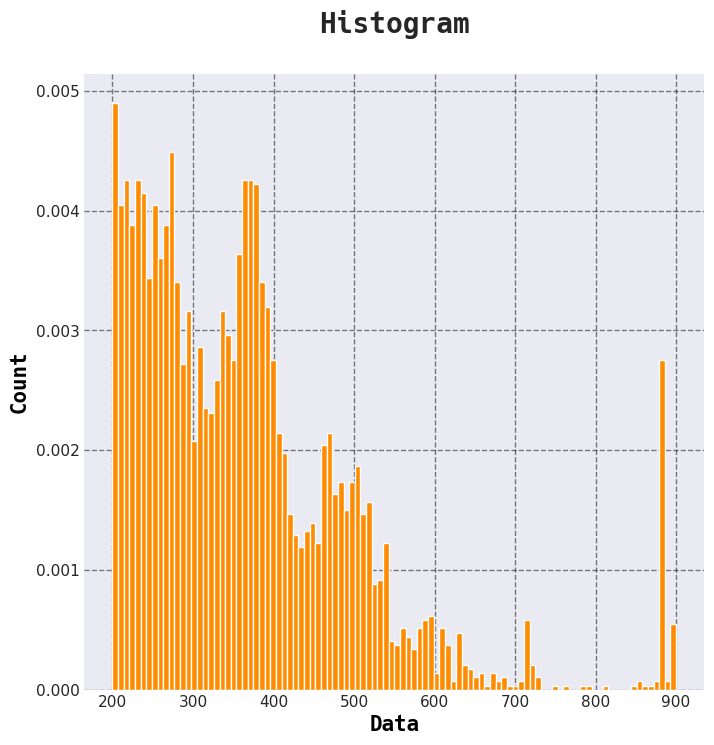

In [155]:
# Create a FontProperties object with the Hack font
font = FontProperties(fname=my_font, size=20, weight='bold')

# Create a histogram with the Hack font
plt.figure(figsize=(8, 8))
plt.style.use('seaborn-darkgrid')
plt.hist(sub_dataset["Energ_Kcal"], color="darkorange", density=True, bins=100, range=(200, 900))
plt.grid(True, alpha=0.5, color='black', linestyle='--')

# Set the title with custom font and bold weight
plt.title("Histogram\n", fontproperties=font, fontsize=20, weight='bold')

# Set the axis labels with custom font and bold weight
plt.xlabel("Data", fontproperties=font, color="black", fontsize=15, weight='bold')
plt.ylabel("Count", fontproperties=font, color="black", fontsize=15, weight='bold')

plt.show()


# Histogram With Seaborn

#### This code creates a histogram plot of the "Lipid_Tot_(g)" column of a Pandas DataFrame called sub_dataset using Seaborn library. Here is a step-by-step explanation of the code:

* sns.displot(x="Lipid_Tot_(g)",data=sub_dataset,height=7.2,bins=40, kde=True,binwidth=8,element="step",color="brown"): This line creates a histogram plot of the "Lipid_Tot_(g)" column of the sub_dataset DataFrame using 40 bins, a bin width of 8, and a kernel density estimate (kde=True). The bars of the histogram are colored brown and the parameter element="step" means that only the outline of the bars is shown.

* plt.title("Histogram\n", fontproperties=font, fontsize=20, weight='bold'): This line sets the plot title to "Histogram" with a custom font my_font, font size of 20, and bold weight.

* plt.xlabel("Data", fontproperties=font, color="black", fontsize=15, weight='bold'): This line sets the x-axis label to "Data" with a custom font my_font, font size of 15, and bold weight.

* plt.ylabel("Count", fontproperties=font, color="black", fontsize=15, weight='bold'): This line sets the y-axis label to "Count" with a custom font my_font, font size of 15, and bold weight.

* plt.show() This line displays the plot on the screen

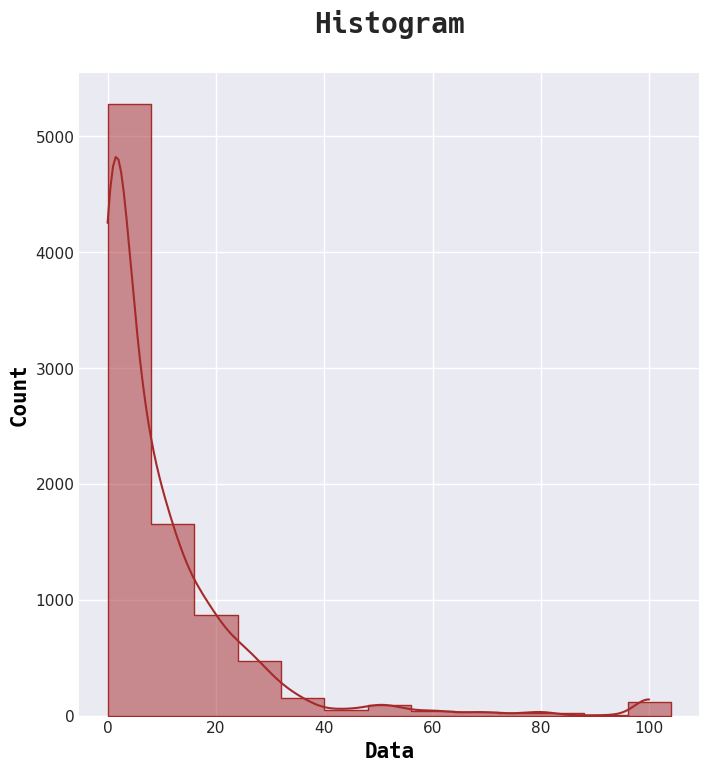

In [156]:
sns.displot(x="Lipid_Tot_(g)",data=sub_dataset,height=7.2,bins=40,
            kde=True,binwidth=8,element="step",color="brown")
plt.title("Histogram\n", fontproperties=font, fontsize=20, weight='bold')

# Set the axis labels with custom font and bold weight
plt.xlabel("Data", fontproperties=font, color="black", fontsize=15, weight='bold')
plt.ylabel("Count", fontproperties=font, color="black", fontsize=15, weight='bold')
plt.show()

# d. Complete frequency distribution of those 10 features, interpret them

* NDB_No: A unique identifier for each food item in the dataset.

* Water_(g): The amount of water in grams present in the food item.

* Energ_Kcal: The amount of energy in kilocalories provided by the food item.

* Protein_(g): The amount of protein in grams present in the food item.

* Lipid_Tot_(g): The amount of total lipids (fats) in grams present in the food item.

* Ash_(g): The amount of ash (minerals) in grams present in the food item.

* Carbohydrt_(g): The amount of carbohydrates in grams present in the food item.

* Fiber_TD_(g): The amount of total dietary fiber in grams present in the food item.

* Vit_D_IU: The amount of vitamin D in International Units present in the food item.

* FA_Sat_(g): The amount of saturated fatty acids in grams present in the food item.

 ## Frequency distribution

* The frequency (f) of a particular value is the number of times the value occurs in the data. The distribution of a variable is the pattern of frequencies, meaning the set of all possible values and the frequencies associated with these values. Frequency distributions are portrayed as frequency tables or charts.

* Frequency distributions can show either the actual number of observations falling in each range or the percentage of observations. In the latter instance, the distribution is called a relative frequency distribution.

## Frequency distribution can be visualized using:

* a pie chart (nominal variable),
* a bar chart (nominal or ordinal variable),
* a line chart (ordinal or discrete variable),
* or a histogram (continuous variable)

In [157]:
sub_dataset.head()

,NDB_No,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Vit_D_IU,FA_Sat_(g)
0,1001,15.87,717,0.85,81.11,2.11,0.06,0.0,0.0,51.368
1,1002,16.72,718,0.49,78.30,1.62,2.87,0.0,0.0,45.390
2,1003,0.24,876,0.28,99.48,0.00,0.00,0.0,0.0,61.924
3,1004,42.41,353,21.40,28.74,5.11,2.34,0.0,21.0,18.669
4,1005,41.11,371,23.24,29.68,3.18,2.79,0.0,22.0,18.764


In [158]:
for col in sub_dataset.columns:
    print(sub_dataset[col].value_counts())


1001     1
18378    1
18372    1
18373    1
18374    1
        ..
11156    1
11154    1
11152    1
11151    1
93600    1
Name: NDB_No, Length: 8790, dtype: int64
2.50     107
0.00      95
3.00      93
2.00      67
2.20      30
        ... 
4.39       1
3.05       1
40.48      1
9.96       1
43.00      1
Name: Water_(g), Length: 4285, dtype: int64
884    78
47     45
56     43
0      39
63     38
       ..
638     1
559     1
665     1
608     1
688     1
Name: Energ_Kcal, Length: 671, dtype: int64
0.00     358
0.10      45
0.07      41
0.20      40
0.30      40
        ... 
17.96      1
14.37      1
25.23      1
15.24      1
16.40      1
Name: Protein_(g), Length: 2664, dtype: int64
0.00      374
0.10      184
0.20      116
100.00     96
0.30       67
         ... 
67.83       1
66.74       1
15.08       1
6.27        1
0.84        1
Name: Lipid_Tot_(g), Length: 2421, dtype: int64
1.783468     325
1.100000     136
0.000000     129
1.000000     121
1.200000     111
            ... 
31.8

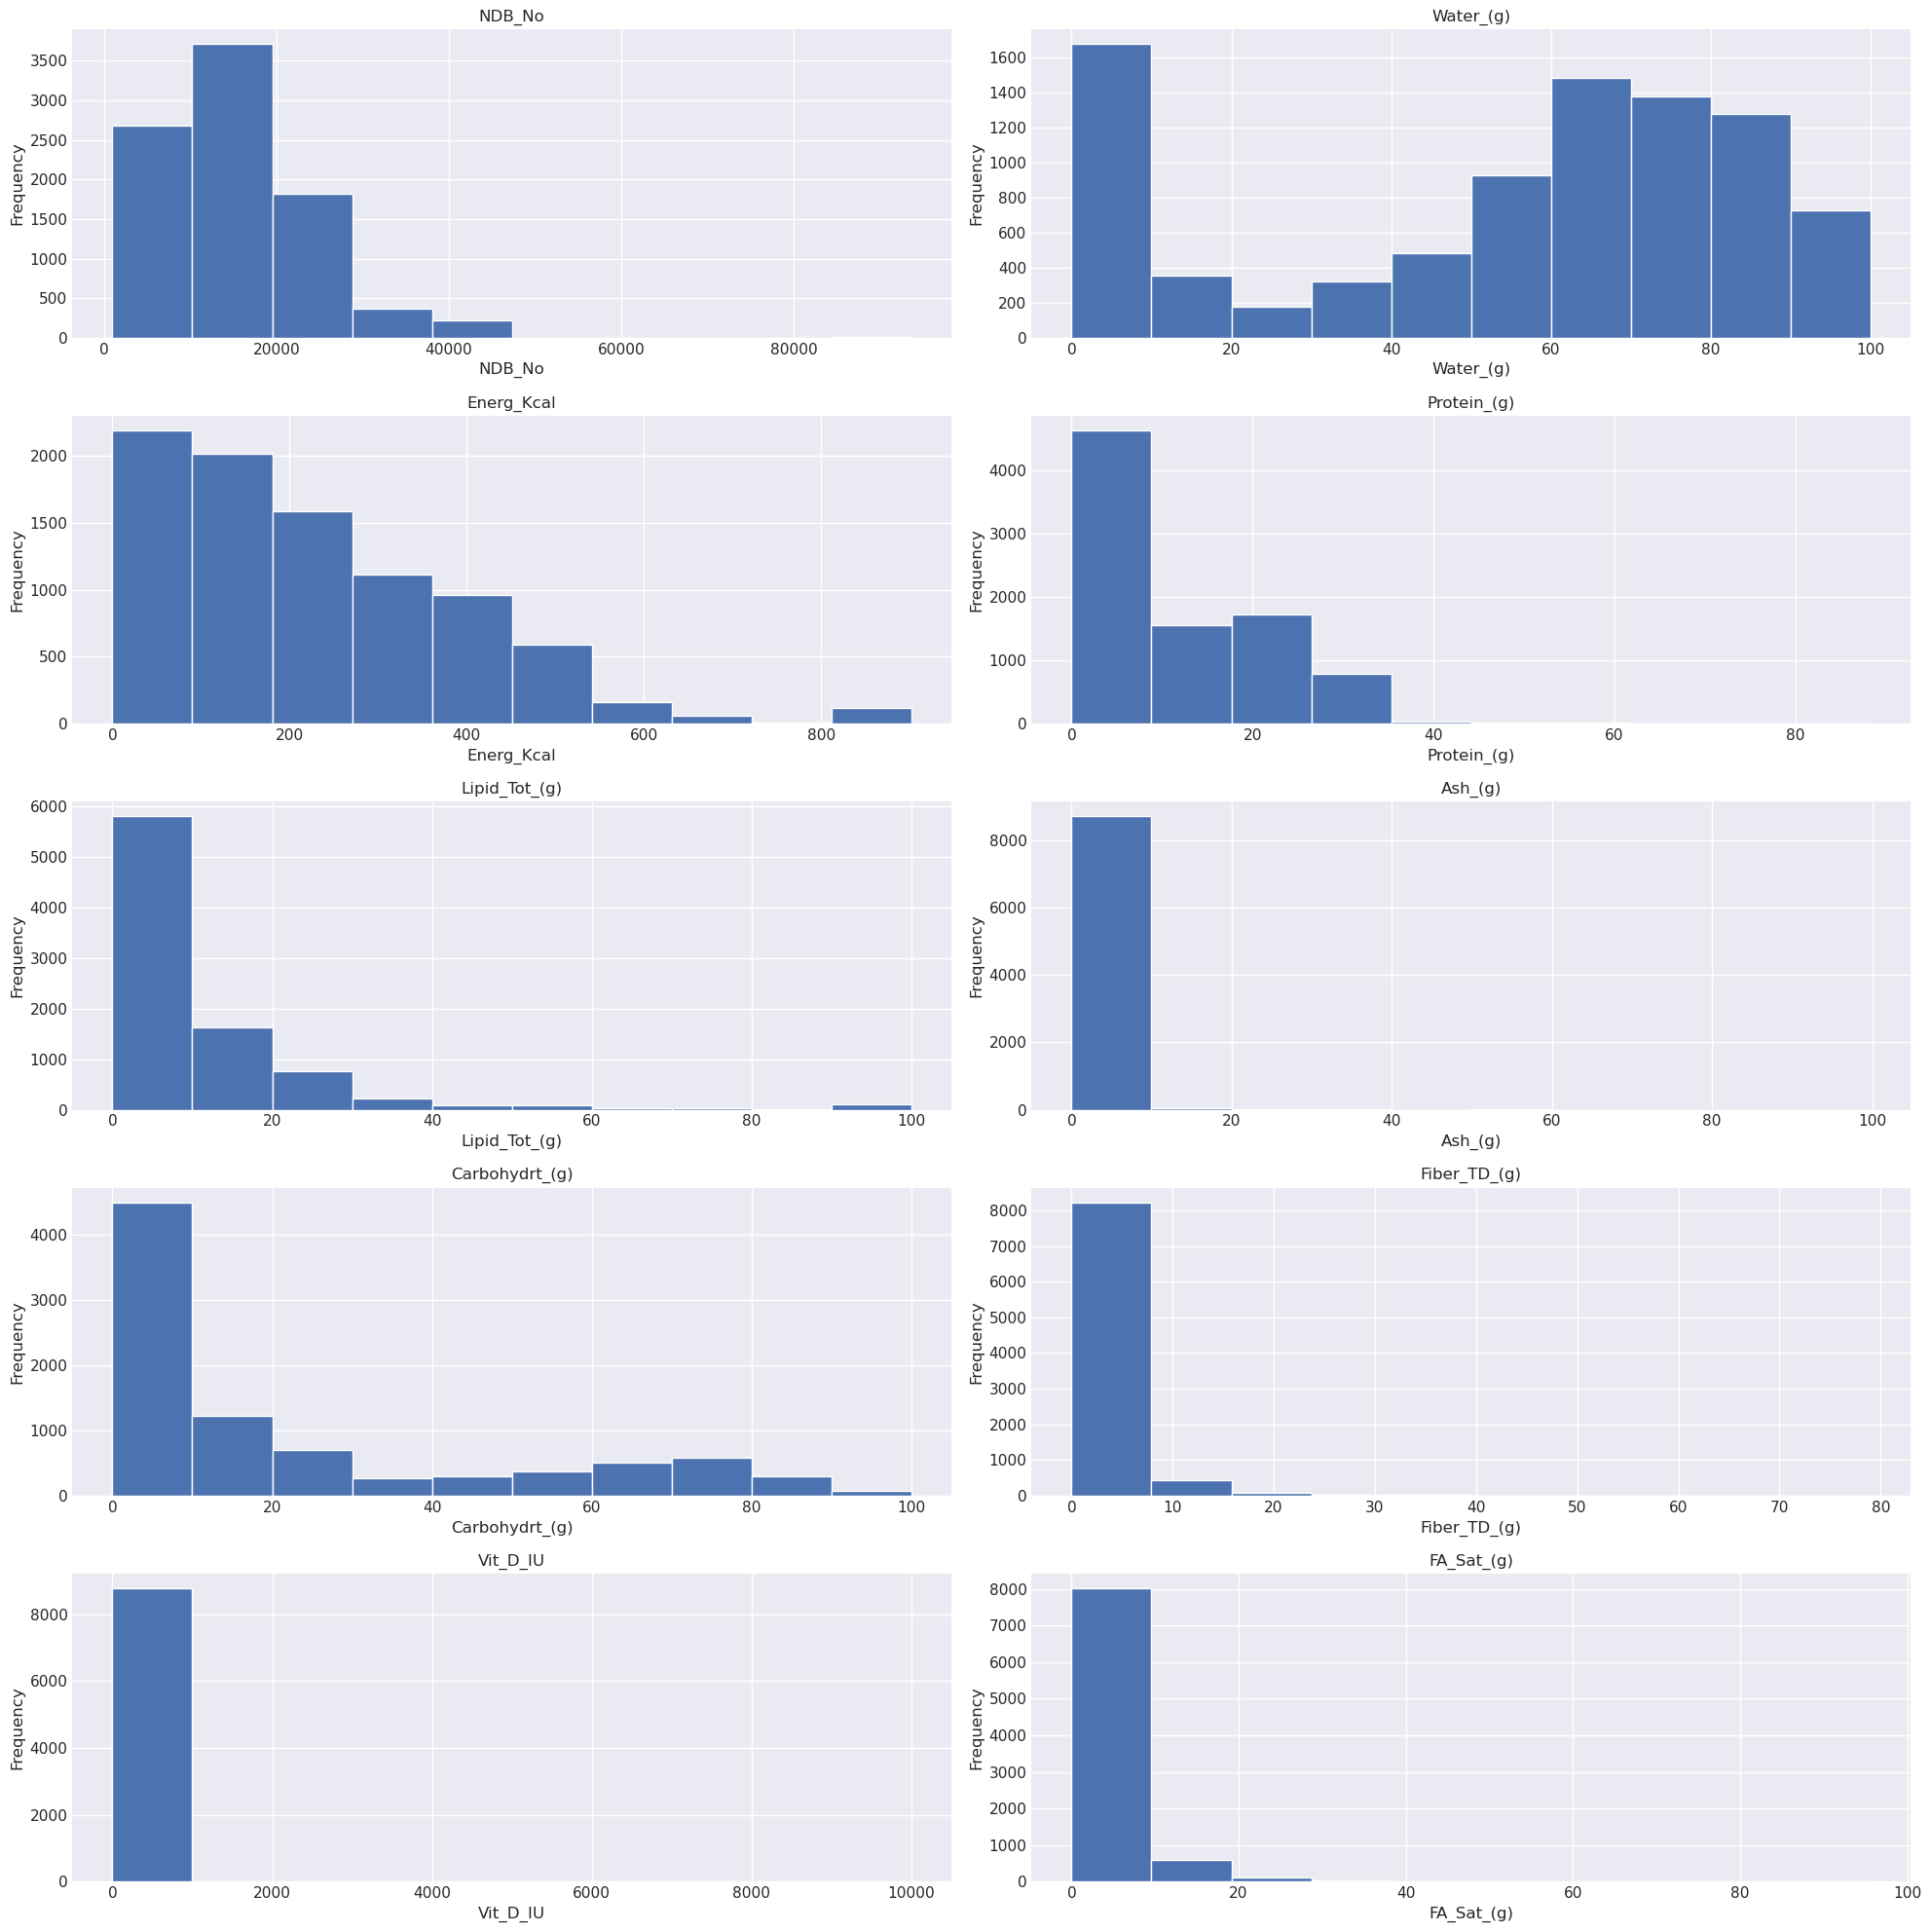

In [159]:

# Define the number of rows and columns for the grid
num_rows = 5
num_cols = 2

# Create the grid of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20,20))

# Flatten the array of subplots to make it easier to work with
axs = axs.flatten()

# Loop over each feature and create a histogram in the corresponding subplot
for i, col in enumerate(sub_dataset.columns):
    axs[i].hist(sub_dataset[col])
    axs[i].set_title(col)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

# Adjust the spacing between the subplots
fig.tight_layout()

# Display the plot
plt.show()


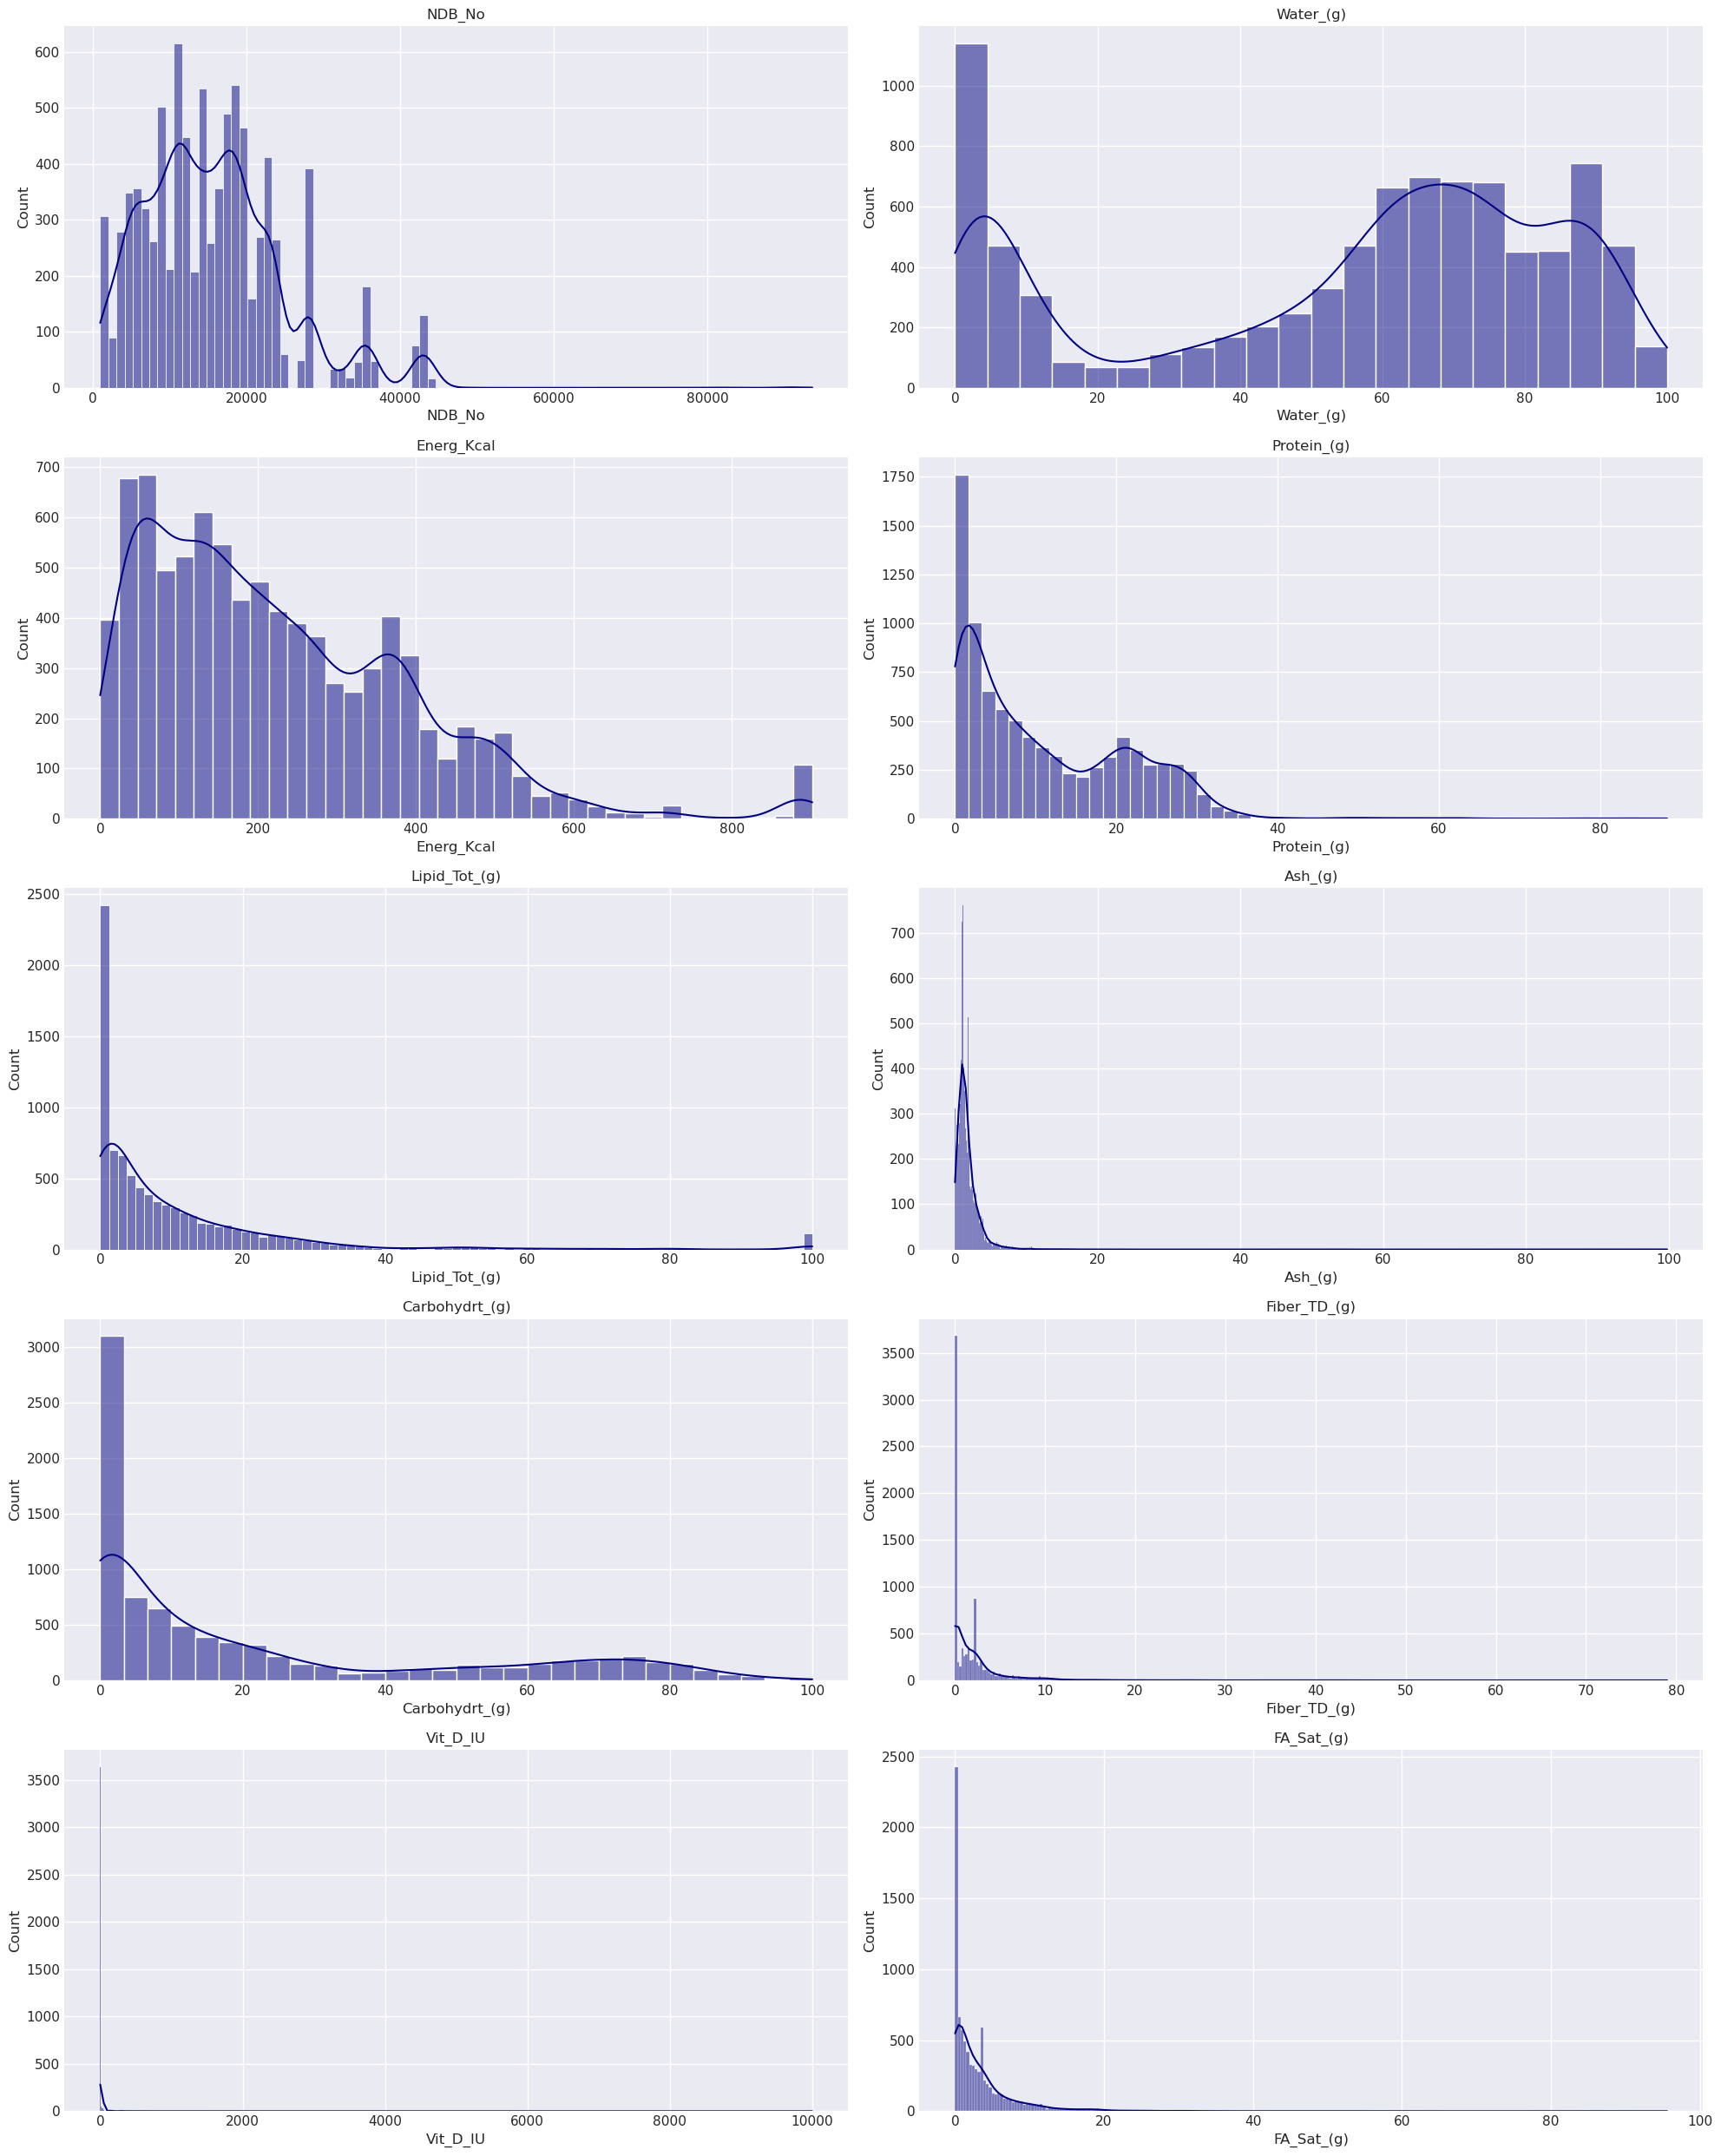

In [160]:
# Create a figure with 10 subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))

# Loop over the columns and plot histograms on each subplot
for i, col in enumerate(sub_dataset.columns):
    sns.histplot(data=sub_dataset, x=col, kde=True, ax=axs[i//2, i%2],color="navy")
    axs[i//2, i%2].set_title(col)

plt.tight_layout()
plt.show()


#  e. Find range, variance, standard deviation and coefficient of variation for those 10 features, interpret them

* Range: The difference between the maximum and minimum values of each feature. This tells us the spread of the data for each feature.

* Variance: The average of the squared differences from the mean. This tells us how much the data deviates from the mean, on average.

* Standard deviation: The square root of the variance. This tells us the spread of the data around the mean.

* Coefficient of variation: The ratio of the standard deviation to the mean, expressed as a percentage. This tells us the relative amount of variation in the data, taking into account the magnitude of the mean.

In [161]:
sub_dataset.head()

,NDB_No,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Vit_D_IU,FA_Sat_(g)
0,1001,15.87,717,0.85,81.11,2.11,0.06,0.0,0.0,51.368
1,1002,16.72,718,0.49,78.30,1.62,2.87,0.0,0.0,45.390
2,1003,0.24,876,0.28,99.48,0.00,0.00,0.0,0.0,61.924
3,1004,42.41,353,21.40,28.74,5.11,2.34,0.0,21.0,18.669
4,1005,41.11,371,23.24,29.68,3.18,2.79,0.0,22.0,18.764


In [162]:
# Calculate range
range_data = sub_dataset.max() - sub_dataset.min()
print(range_data)

NDB_No            92599.00
Water_(g)           100.00
Energ_Kcal          902.00
Protein_(g)          88.32
Lipid_Tot_(g)       100.00
Ash_(g)              99.80
Carbohydrt_(g)      100.00
Fiber_TD_(g)         79.00
Vit_D_IU          10000.00
FA_Sat_(g)           95.60
dtype: float64


In [163]:
# Calculate variance
var_data = sub_dataset.var()
print(var_data)

NDB_No            8.558865e+07
Water_(g)         9.468608e+02
Energ_Kcal        2.885838e+04
Protein_(g)       1.108909e+02
Lipid_Tot_(g)     2.501092e+02
Ash_(g)           8.693850e+00
Carbohydrt_(g)    7.436977e+02
Fiber_TD_(g)      1.791348e+01
Vit_D_IU          1.517188e+04
FA_Sat_(g)        4.080784e+01
dtype: float64


In [164]:
# Calculate standard deviation
std_data = sub_dataset.std()
print(std_data)

NDB_No            9251.413586
Water_(g)           30.771103
Energ_Kcal         169.877539
Protein_(g)         10.530474
Lipid_Tot_(g)       15.814842
Ash_(g)              2.948533
Carbohydrt_(g)      27.270822
Fiber_TD_(g)         4.232431
Vit_D_IU           123.174170
FA_Sat_(g)           6.388101
dtype: float64


In [165]:
cv_data = (std_data / sub_dataset.mean()) * 100
print(cv_data)

NDB_No             59.063532
Water_(g)          56.865352
Energ_Kcal         75.061557
Protein_(g)        92.837998
Lipid_Tot_(g)     149.850808
Ash_(g)           165.325804
Carbohydrt_(g)    123.242859
Fiber_TD_(g)      193.487436
Vit_D_IU          535.769516
FA_Sat_(g)        178.621508
dtype: float64


# Combine the results into a single dataframe

In [166]:
stats_data = pd.DataFrame({'Range': range_data,'Variance': var_data,'Standard Deviation': std_data, 
             'Coefficient of Variation': cv_data})


In [167]:
stats_data

,Range,Variance,Standard Deviation,Coefficient of Variation
NDB_No,92599.00,8.558865e+07,9251.413586,59.063532
Water_(g),100.00,9.468608e+02,30.771103,56.865352
Energ_Kcal,902.00,2.885838e+04,169.877539,75.061557
Protein_(g),88.32,1.108909e+02,10.530474,92.837998
Lipid_Tot_(g),100.00,2.501092e+02,15.814842,149.850808
Ash_(g),99.80,8.693850e+00,2.948533,165.325804
Carbohydrt_(g),100.00,7.436977e+02,27.270822,123.242859
Fiber_TD_(g),79.00,1.791348e+01,4.232431,193.487436
Vit_D_IU,10000.00,1.517188e+04,123.174170,535.769516
FA_Sat_(g),95.60,4.080784e+01,6.388101,178.621508


# f. Find skewness, and kurtosis of these 10 features, interpret them.

# What is skewness? 


* Skewness is a measure of the symmetry of your data distribution. A distribution is symmetric if it looks the same to the left and right of the center point

* If the mean is greater than the mode, the distribution is positively skewed.

* If the mean is less than the mode, the distribution is negatively skewed.

* If the mean is greater than the median, the distribution is positively skewed.

* If the mean is less than the median, the distribution is negatively skewed.

![](https://global.discourse-cdn.com/business6/uploads/analyticsvidhya/original/2X/f/f1e9c96aff2dda1eb033010b1d0bc285330d9837.jpg)

# what is kurtosis?

* Kurtosis is a measure of the tailedness of a distribution. Tailedness is how often outliers occur. Excess kurtosis is the tailedness of a distribution relative to a normal distribution.

* Distributions with medium kurtosis (medium tails) are mesokurtic.

* Distributions with low kurtosis (thin tails) are platykurtic.

* Distributions with high kurtosis (fat tails) are leptokurtic.

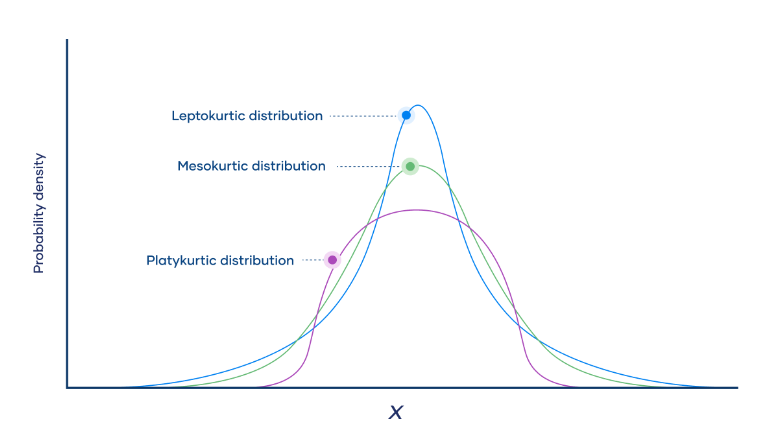

In [168]:
sub_dataset.head()

,NDB_No,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Vit_D_IU,FA_Sat_(g)
0,1001,15.87,717,0.85,81.11,2.11,0.06,0.0,0.0,51.368
1,1002,16.72,718,0.49,78.30,1.62,2.87,0.0,0.0,45.390
2,1003,0.24,876,0.28,99.48,0.00,0.00,0.0,0.0,61.924
3,1004,42.41,353,21.40,28.74,5.11,2.34,0.0,21.0,18.669
4,1005,41.11,371,23.24,29.68,3.18,2.79,0.0,22.0,18.764


In [169]:
skewness = []
kurt = []

for col in sub_dataset.columns:
    skewness.append(skew(sub_dataset[col]))
    kurt.append(kurtosis(sub_dataset[col]))
    
skew_kurtho_data = pd.DataFrame({'Feature': sub_dataset.columns, 'Skewness': skewness, 'Kurtosis': kurt})


In [170]:
skew_kurtho_data.head(10)

,Feature,Skewness,Kurtosis
0,NDB_No,1.116168,3.071402
1,Water_(g),-0.570781,-1.034114
2,Energ_Kcal,1.148414,1.709384
3,Protein_(g),1.166169,2.644868
4,Lipid_Tot_(g),3.309159,13.746811
5,Ash_(g),17.288833,442.927250
6,Carbohydrt_(g),1.127405,-0.148288
7,Fiber_TD_(g),5.860500,58.522088
8,Vit_D_IU,61.633021,4902.739184
9,FA_Sat_(g),6.722812,72.228230


# Skewness

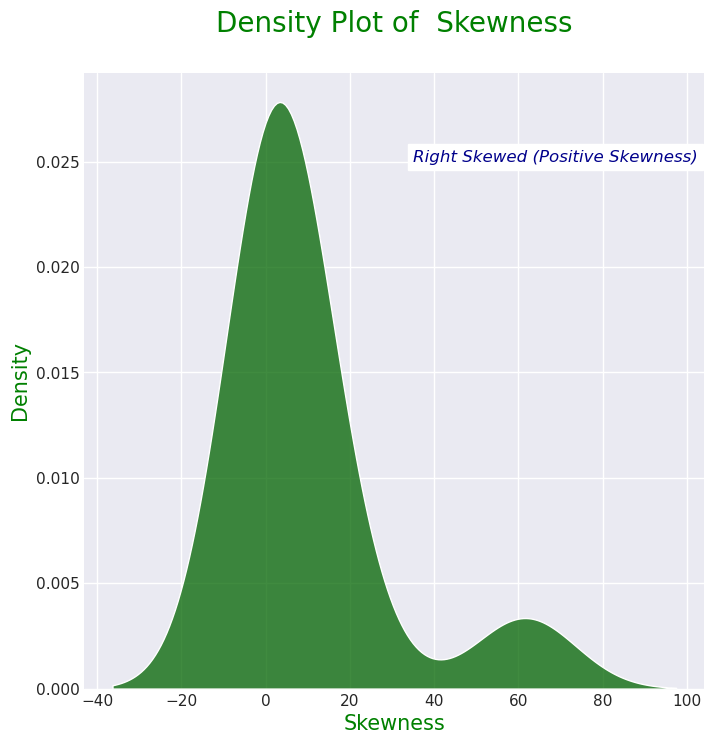

In [171]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=skew_kurtho_data['Skewness'], fill=True,multiple="stack",color='darkgreen')
plt.xlabel('Skewness',fontsize=15,color="green")
plt.ylabel('Density',fontsize=15,color="green")
plt.title('Density Plot of  Skewness\n',fontsize=20,color="green")
plt.text(35, 0.025, 'Right Skewed (Positive Skewness)',fontsize=12,color="darkblue",style="italic",bbox=dict(facecolor='white'))
plt.show()

# Kurtosis

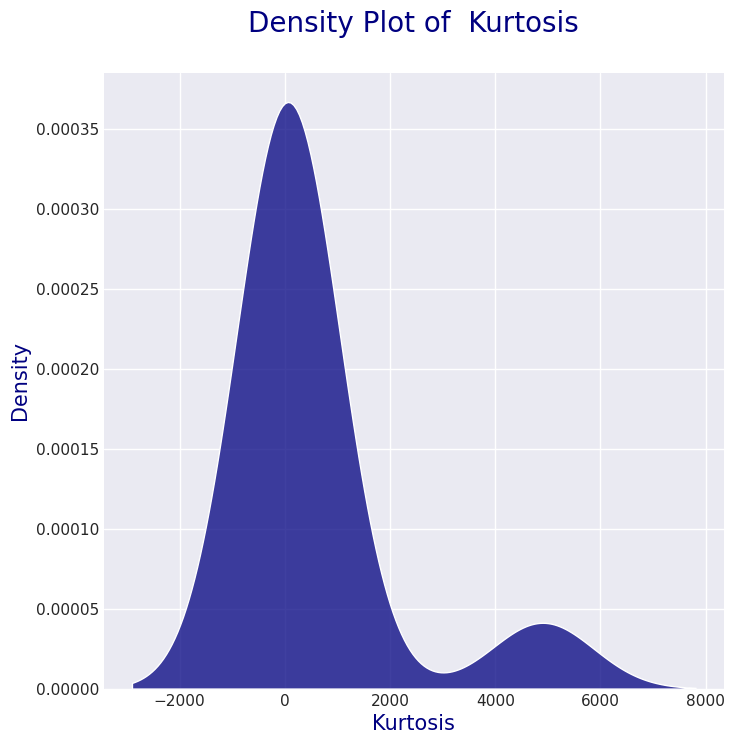

In [172]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=skew_kurtho_data['Kurtosis'], fill=True,multiple="stack",color='navy')
plt.xlabel('Kurtosis',fontsize=15,color="navy")
plt.ylabel('Density',fontsize=15,color="navy")
plt.title('Density Plot of  Kurtosis\n',fontsize=20,color="navy")
plt.show()

* The feature "NDB_No" has a positive kurtosis of 3.071402, indicating a relatively peaked distribution with heavy tails.

* The feature "Water_(g)" has a negative kurtosis of -1.034114, indicating a relatively flat distribution with light tails.

* The feature "Energ_Kcal" has a positive kurtosis of 1.709384, indicating a relatively peaked distribution with heavy tails.

* The feature "Protein_(g)" has a positive kurtosis of 2.644868, indicating a relatively peaked distribution with heavy tails.

* The feature "Lipid_Tot_(g)" has a positive kurtosis of 13.746811, indicating a very peaked distribution with very heavy tails.

* The feature "Ash_(g)" has a positive kurtosis of 442.927250, indicating an extremely peaked distribution with extremely heavy tails.

* The feature "Carbohydrt" has a negative kurtosis of -0.148288, indicating a relatively flat distribution with light tails.

* The feature "Fiber_TD_(g)" has a positive kurtosis of 58.522088, indicating a very peaked distribution with very heavy tails.

* The feature "Vit_D_IU" has a positive kurtosis of 4902.739184, indicating an extremely peaked distribution with extremely heavy tails.

* The feature "FA_Sat_(g)" has a positive kurtosis of 72.228230, indicating a very peaked distribution with very heavy tails.

# Task 02 (Numpy, Pandas, Matplotlib) (15)

# a. Create a dataset having 10 numerical features. Find basic description of the features.

In [173]:
# Creating a dataset with 10 numerical features
np.random.seed(42)
data = pd.DataFrame(np.random.randn(1000, 10), columns=['Feature{}'.format(i) for i in range(1, 11)])


In [174]:
data.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040


In [175]:
data.describe()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.010788,0.031292,-0.022542,-0.043075,0.013622,-0.029252,-0.002689,0.005495,-0.023104,0.038105
std,1.005433,1.016046,0.983366,0.983406,1.012645,1.037024,1.031230,1.030962,0.986846,0.945284
min,-3.922400,-3.688365,-3.241267,-2.943142,-3.138515,-3.170426,-2.801912,-3.601085,-3.007632,-3.176704
25%,-0.616527,-0.631506,-0.702626,-0.750008,-0.651541,-0.749592,-0.744779,-0.713176,-0.650034,-0.559290
50%,0.014006,0.007605,-0.015036,-0.001346,-0.012020,-0.012086,-0.024976,-0.013284,-0.003221,0.019097
75%,0.679698,0.685621,0.613766,0.638310,0.721896,0.680087,0.683319,0.696602,0.608861,0.687027
max,3.076860,3.529055,3.152057,3.117681,2.935658,3.926238,3.243093,3.137749,3.377383,3.852731


# b. Using the mean values, perform a stepwise conditional “For Loop” to filter the datasets into smaller sub-dataset.

In [176]:
# Using mean values, performing a stepwise conditional "For Loop" to filter the datasets into smaller sub-datasets
sub_datasets = {}
for i in range(1, 11):
    for j in range(i+1, 11):
        mean_i = data['Feature' + str(i)].mean()
        mean_j = data['Feature' + str(j)].mean()
        sub_data = data.loc[(data['Feature' + str(i)] > mean_i) & (data['Feature' + str(j)] > mean_j)]
        sub_datasets['feat' + str(i) + '_feat' + str(j)] = sub_data




In [177]:
for key in sub_datasets:
    print(f"Number of rows in sub-dataset '{key}': {len(sub_datasets[key])}")


Number of rows in sub-dataset 'feat1_feat2': 247
Number of rows in sub-dataset 'feat1_feat3': 254
Number of rows in sub-dataset 'feat1_feat4': 257
Number of rows in sub-dataset 'feat1_feat5': 252
Number of rows in sub-dataset 'feat1_feat6': 253
Number of rows in sub-dataset 'feat1_feat7': 245
Number of rows in sub-dataset 'feat1_feat8': 254
Number of rows in sub-dataset 'feat1_feat9': 253
Number of rows in sub-dataset 'feat1_feat10': 234
Number of rows in sub-dataset 'feat2_feat3': 257
Number of rows in sub-dataset 'feat2_feat4': 249
Number of rows in sub-dataset 'feat2_feat5': 242
Number of rows in sub-dataset 'feat2_feat6': 243
Number of rows in sub-dataset 'feat2_feat7': 244
Number of rows in sub-dataset 'feat2_feat8': 254
Number of rows in sub-dataset 'feat2_feat9': 256
Number of rows in sub-dataset 'feat2_feat10': 246
Number of rows in sub-dataset 'feat3_feat4': 247
Number of rows in sub-dataset 'feat3_feat5': 246
Number of rows in sub-dataset 'feat3_feat6': 254
Number of rows in 

# c. Write a function to measure their overall mean, median, mode, std deviation, variance, kurtosis and skewness. Interpret them.

* Mean: The mean is the average value of the dataset. It is obtained by adding up all the values in the dataset and dividing by the number of values. It represents the central tendency of the data.

* Median: The median is the middle value of the dataset when it is sorted in ascending or descending order. It is a measure of central tendency that is not influenced by outliers.

* Mode: The mode is the value that appears most frequently in the dataset. It represents the most common value in the data.

* Standard Deviation: The standard deviation measures the amount of variation or dispersion in the dataset. It is calculated by taking the square root of the variance.

* Variance: The variance is the average of the squared differences from the mean. It represents the degree of spread of the data.

* Kurtosis: Kurtosis measures the degree of peakedness or flatness of a distribution compared to a normal distribution. Positive values indicate a more peaked distribution, while negative values indicate a flatter distribution.

* Skewness: Skewness measures the degree of asymmetry of a distribution. Positive values indicate a distribution that is skewed to the right, while negative values indicate a distribution that is skewed to the left.

In [178]:
def calculate_mydata(data):
    mean=np.mean(data)
    median=np.median(data)
    mode=stats.mode(data)[0][0]
    std_dev=np.std(data)
    variance=np.var(data)
    kurtosis = stats.kurtosis(data)
    skewness = stats.skew(data)
    
    return mean,median,mode,std_dev,variance,kurtosis,skewness
    
    
    
mean, median, mode, std_dev, variance, kurtosis, skewness = calculate_mydata(data)
        

In [179]:
print(f"Mean Value is :\n {mean}")


Mean Value is :
 Feature1     0.010788
Feature2     0.031292
Feature3    -0.022542
Feature4    -0.043075
Feature5     0.013622
Feature6    -0.029252
Feature7    -0.002689
Feature8     0.005495
Feature9    -0.023104
Feature10    0.038105
dtype: float64


In [180]:
print(f"Median Value is :\n{median}")


Median Value is :
-0.0025949757928775408


In [181]:
print(f"Mode Value is :\n{mode}")


Mode Value is :
[-3.92240025 -3.68836529 -3.24126734 -2.94314157 -3.13851467 -3.17042574
 -2.80191157 -3.6010851  -3.00763234 -3.17670381]


In [182]:
print(f"Standard Deviation value is:\n{std_dev}")



Standard Deviation value is:
Feature1     1.004930
Feature2     1.015538
Feature3     0.982874
Feature4     0.982915
Feature5     1.012139
Feature6     1.036505
Feature7     1.030715
Feature8     1.030446
Feature9     0.986353
Feature10    0.944811
dtype: float64


In [183]:
print(f"Variance Value is :\n{variance}")

Variance Value is :
Feature1     1.009884
Feature2     1.031317
Feature3     0.966041
Feature4     0.966121
Feature5     1.024425
Feature6     1.074343
Feature7     1.062373
Feature8     1.061820
Feature9     0.972892
Feature10    0.892668
dtype: float64


In [184]:
print(f"Skewness Value is :\n{skewness}")

Skewness Value is :
[-0.16272347 -0.02132037  0.11011783 -0.02167164 -0.03774372  0.06715638
  0.11211708 -0.00197317 -0.01989493 -0.01039305]


In [185]:
print(f"Kurtosis Value is :\n{kurtosis}")

Kurtosis Value is :
[ 0.31608048  0.14181429 -0.02516383 -0.16433465 -0.05352398 -0.03660287
 -0.08259986 -0.02952677  0.08465889  0.07308056]


# d. Perform bi-variate analysis of the 10 new features (5 different pairs). Create 5 scatter and bar plots, explain their relations.

In [186]:
data.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040


# Create Five ScatterPlot

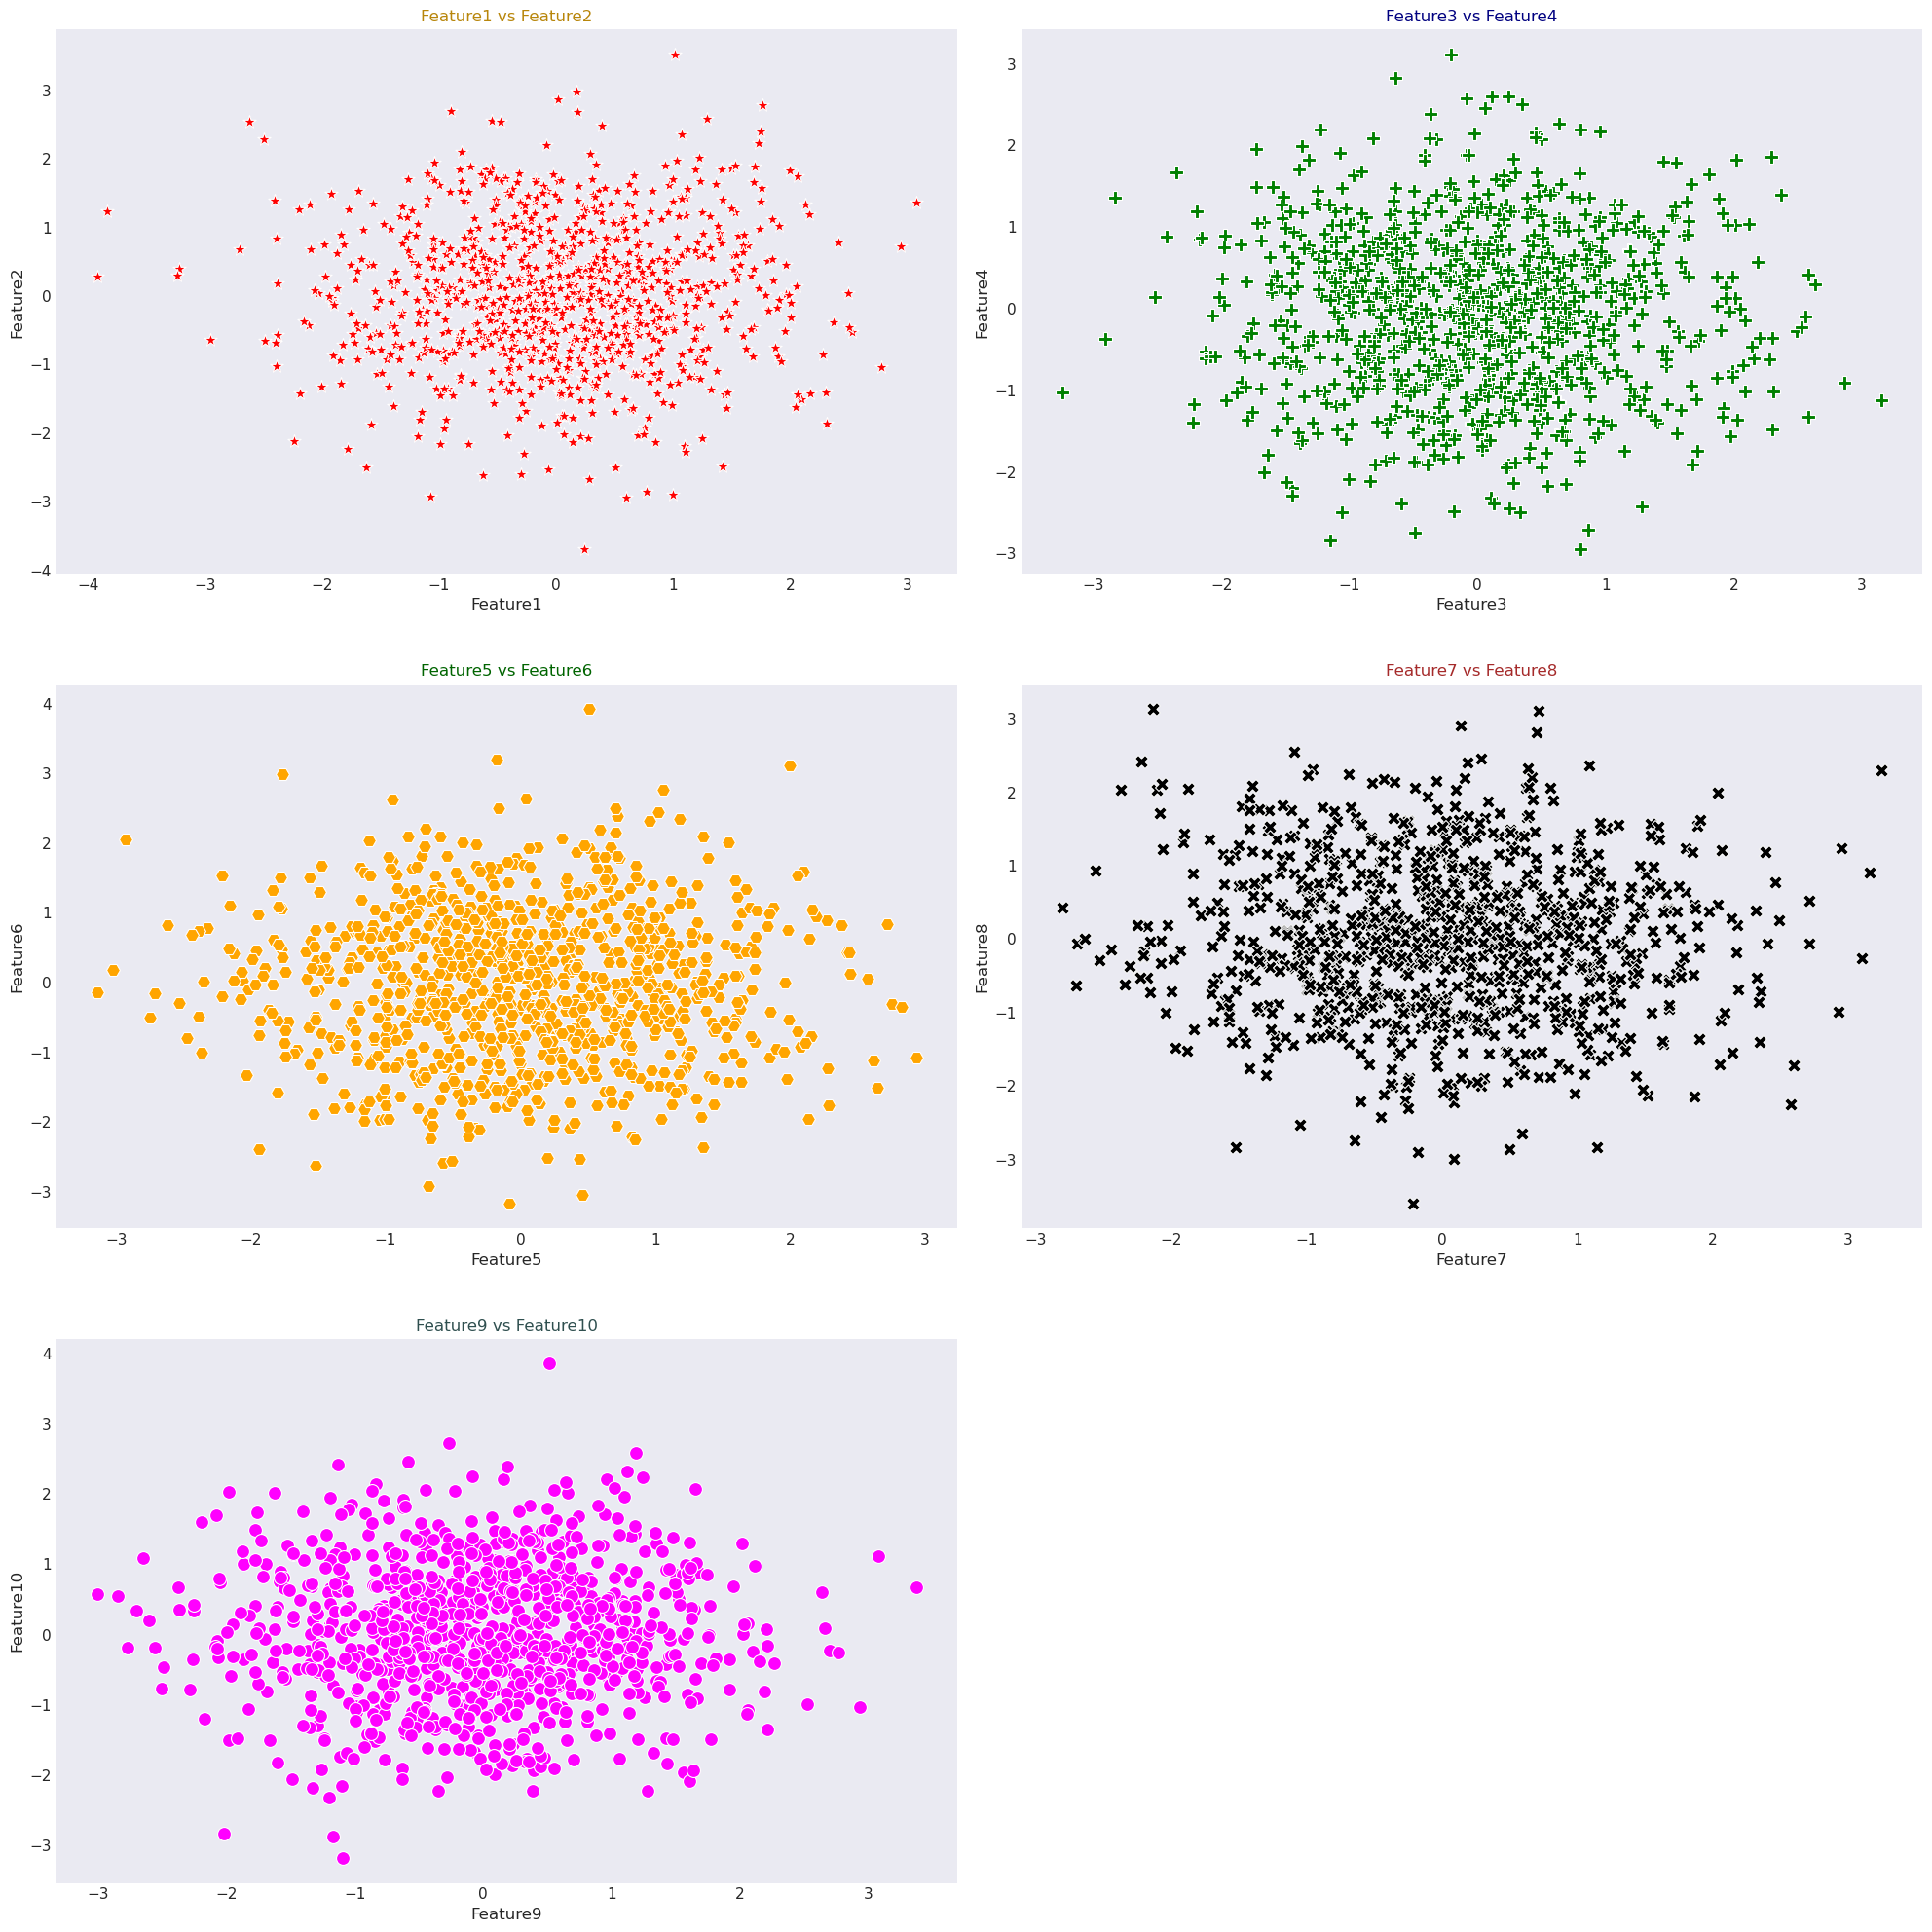

In [187]:
plt.style.use("seaborn-dark")
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(20,20))
sns.scatterplot(x="Feature1",y="Feature2",data=data,ax=ax[0,0],marker="*",color="red",s=100)
ax[0,0].set_xlabel("Feature1")
ax[0,0].set_ylabel("Feature2")
ax[0,0].set_title("Feature1 vs Feature2",color="darkgoldenrod")

sns.scatterplot(x="Feature3",y="Feature4",data=data,ax=ax[0,1],marker="P",color="green",s=100)
ax[0,1].set_xlabel("Feature3")
ax[0,1].set_ylabel("Feature4")
ax[0,1].set_title("Feature3 vs Feature4",color="navy")

sns.scatterplot(x="Feature5",y="Feature6",data=data,ax=ax[1,0],marker="H",color="orange",s=100)
ax[1,0].set_xlabel("Feature5")
ax[1,0].set_ylabel("Feature6")
ax[1,0].set_title("\n\nFeature5 vs Feature6",color="darkgreen")

sns.scatterplot(x="Feature7",y="Feature8",data=data,ax=ax[1,1],marker="X",color="black",s=100)
ax[1,1].set_xlabel("Feature7")
ax[1,1].set_ylabel("Feature8")
ax[1,1].set_title("\n\nFeature7 vs Feature8",color="brown")

sns.scatterplot(x="Feature9",y="Feature10",data=data,ax=ax[2,0],marker="o",color="magenta",s=100)
ax[2,0].set_xlabel("Feature9")
ax[2,0].set_ylabel("Feature10")
ax[2,0].set_title("\n\nFeature9 vs Feature10",color="darkslategray")

# Remove empty subplot
ax[2,1].remove()

plt.tight_layout()
plt.show()


# Create Five Bar Plot

<Figure size 640x480 with 0 Axes>

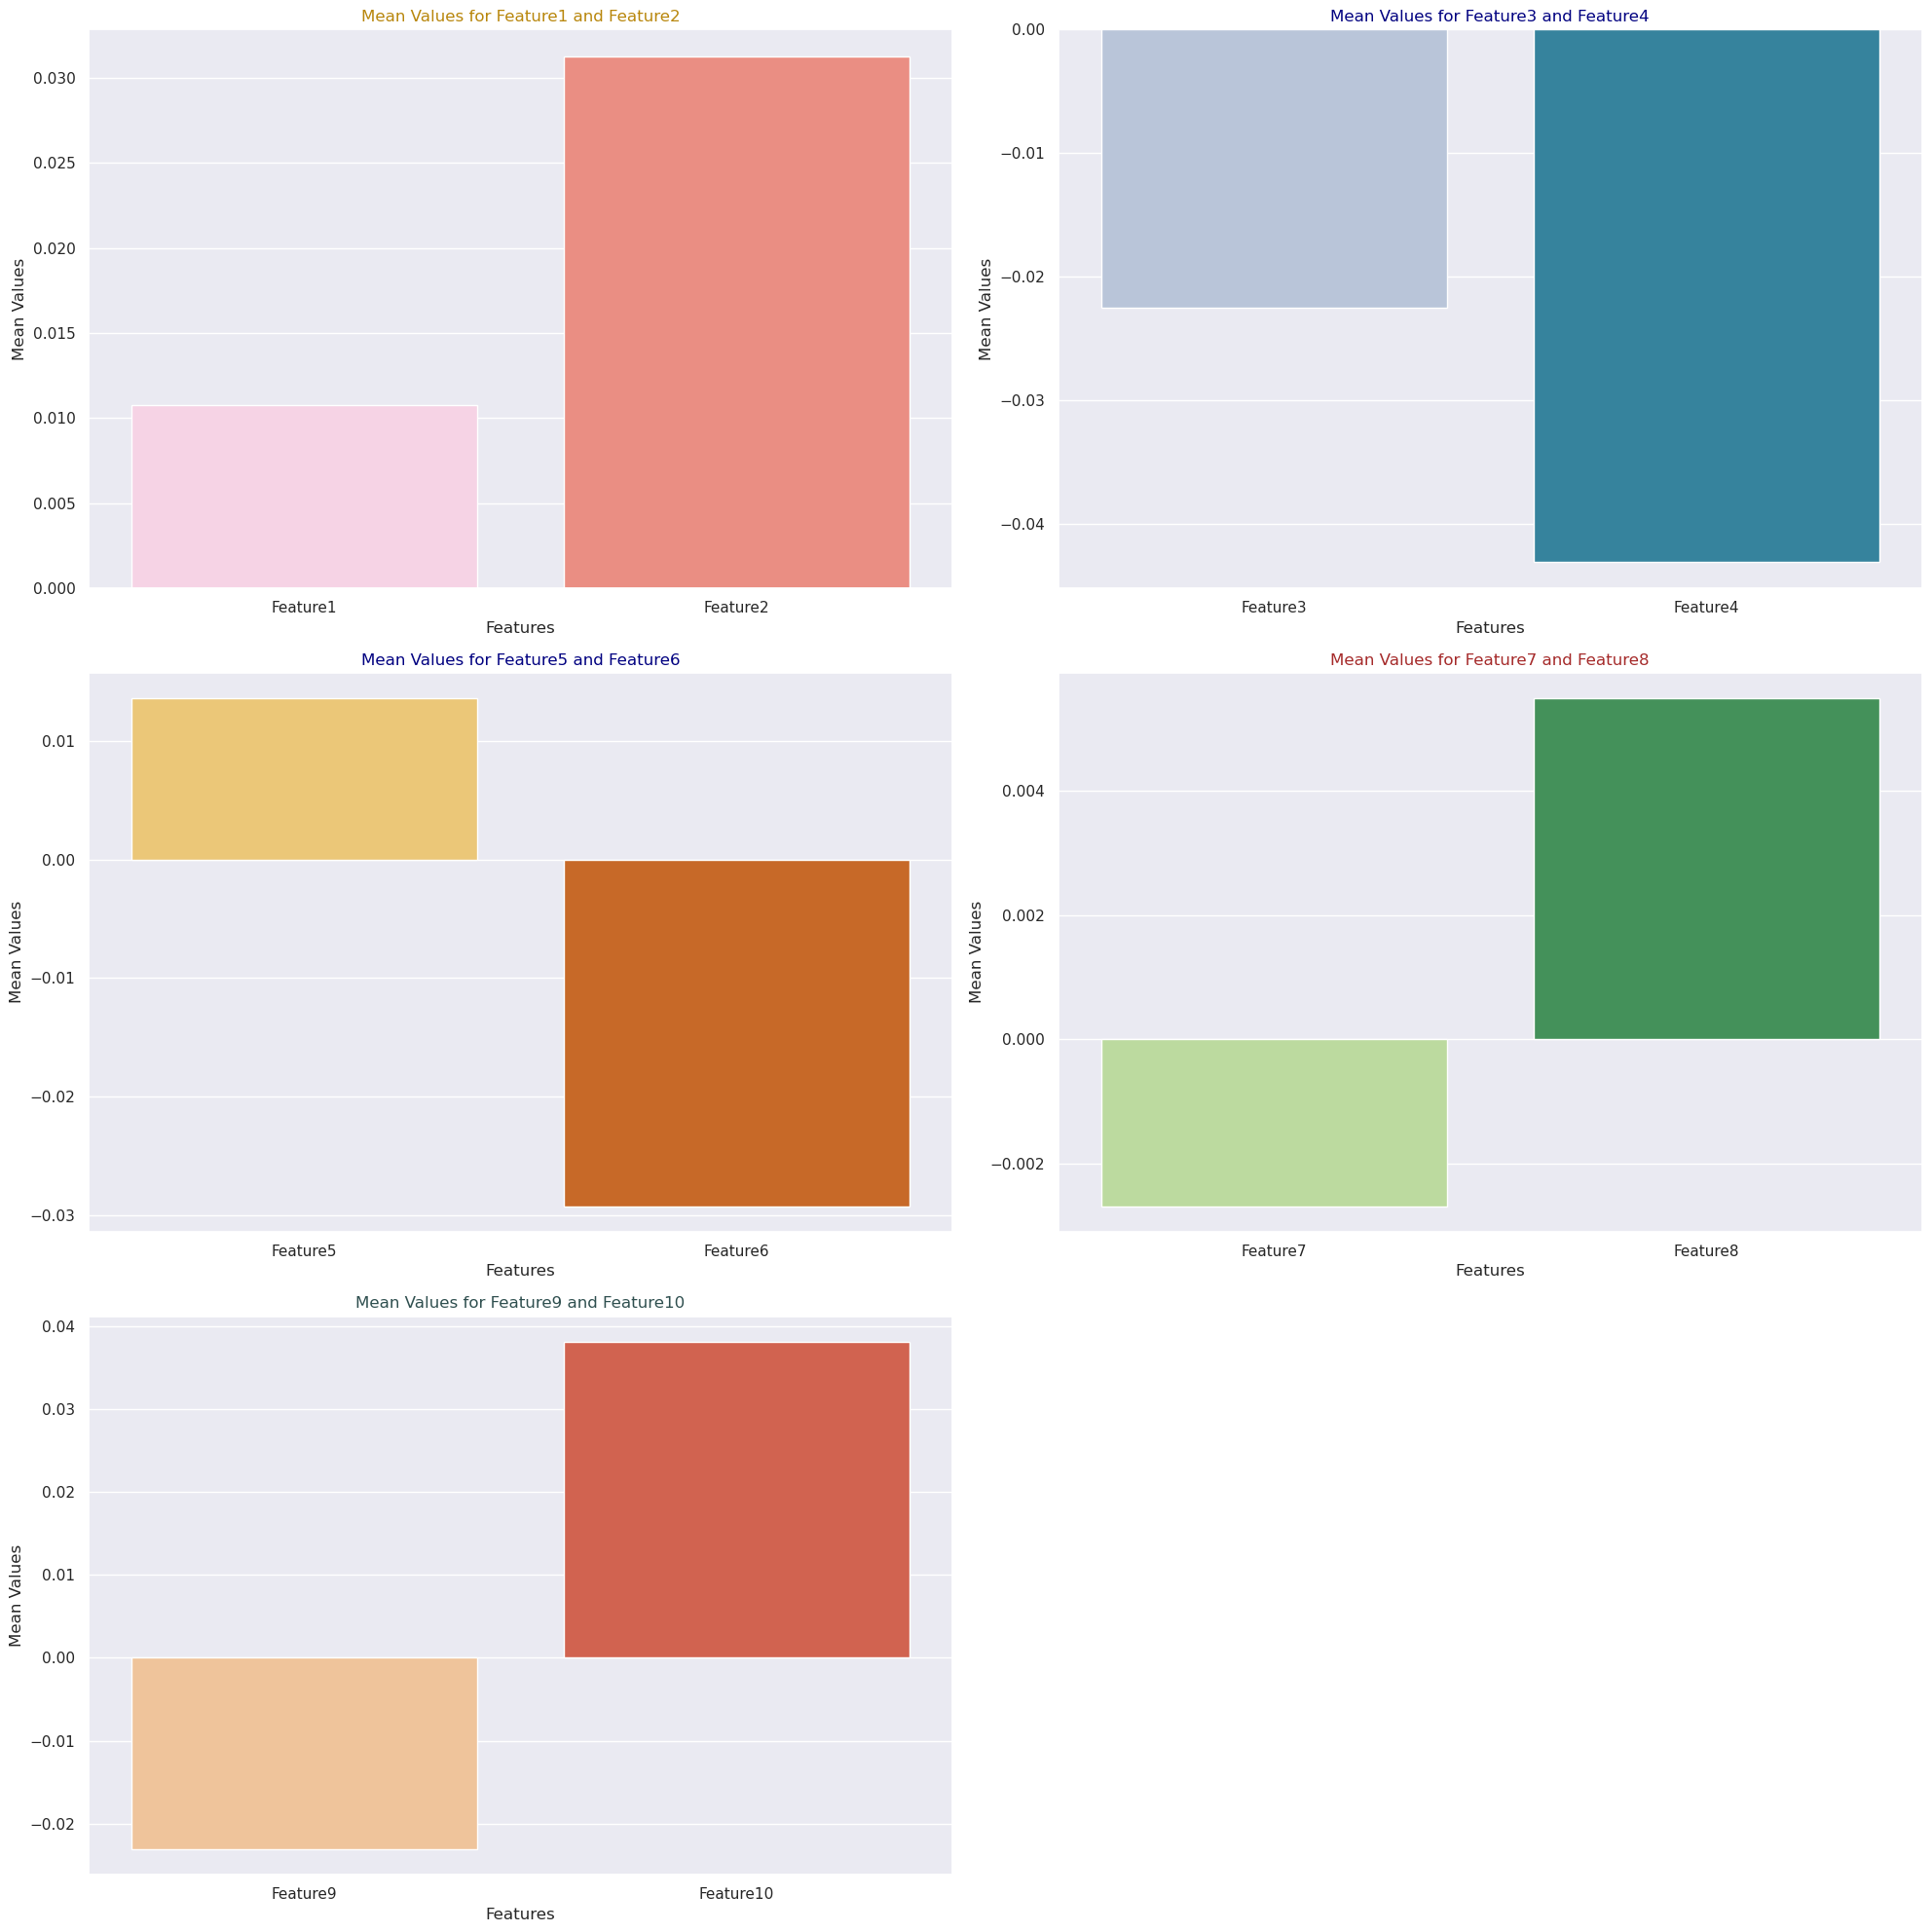

In [188]:
# Set style
sns.set(style="darkgrid")
# Set palettes for each plot
palettes = ["Set3_r", "PuBuGn", "YlOrBr", "YlGn", "OrRd", "RdPu"]

sns.despine(left=True, bottom=True)

# Create subplots
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(20,20))

# Plot bar plots
sns.barplot(x=['Feature1', 'Feature2'], y=[data['Feature1'].mean(), data['Feature2'].mean()], ax=ax[0,0],palette=palettes[0])
ax[0,0].set_xlabel("Features")
ax[0,0].set_ylabel("Mean Values")
ax[0,0].set_title("Mean Values for Feature1 and Feature2",color="darkgoldenrod")

sns.barplot(x=['Feature3', 'Feature4'], y=[data['Feature3'].mean(), data['Feature4'].mean()], ax=ax[0,1],palette=palettes[1])
ax[0,1].set_xlabel("Features")
ax[0,1].set_ylabel("Mean Values")
ax[0,1].set_title("Mean Values for Feature3 and Feature4",color="navy")

sns.barplot(x=['Feature5', 'Feature6'], y=[data['Feature5'].mean(), data['Feature6'].mean()], ax=ax[1,0],palette=palettes[2])
ax[1,0].set_xlabel("Features")
ax[1,0].set_ylabel("Mean Values")
ax[1,0].set_title("Mean Values for Feature5 and Feature6",color="navy")

sns.barplot(x=['Feature7', 'Feature8'], y=[data['Feature7'].mean(), data['Feature8'].mean()], ax=ax[1,1],palette=palettes[3])
ax[1,1].set_xlabel("Features")
ax[1,1].set_ylabel("Mean Values")
ax[1,1].set_title("Mean Values for Feature7 and Feature8",color="brown")

sns.barplot(x=['Feature9', 'Feature10'], y=[data['Feature9'].mean(), data['Feature10'].mean()], ax=ax[2,0],palette=palettes[4])
ax[2,0].set_xlabel("Features")
ax[2,0].set_ylabel("Mean Values")
ax[2,0].set_title("Mean Values for Feature9 and Feature10",color="darkslategray")
# Remove empty subplot
ax[2,1].remove()


plt.tight_layout()
plt.show()


# e. Create a stack plot, and explain the differences.

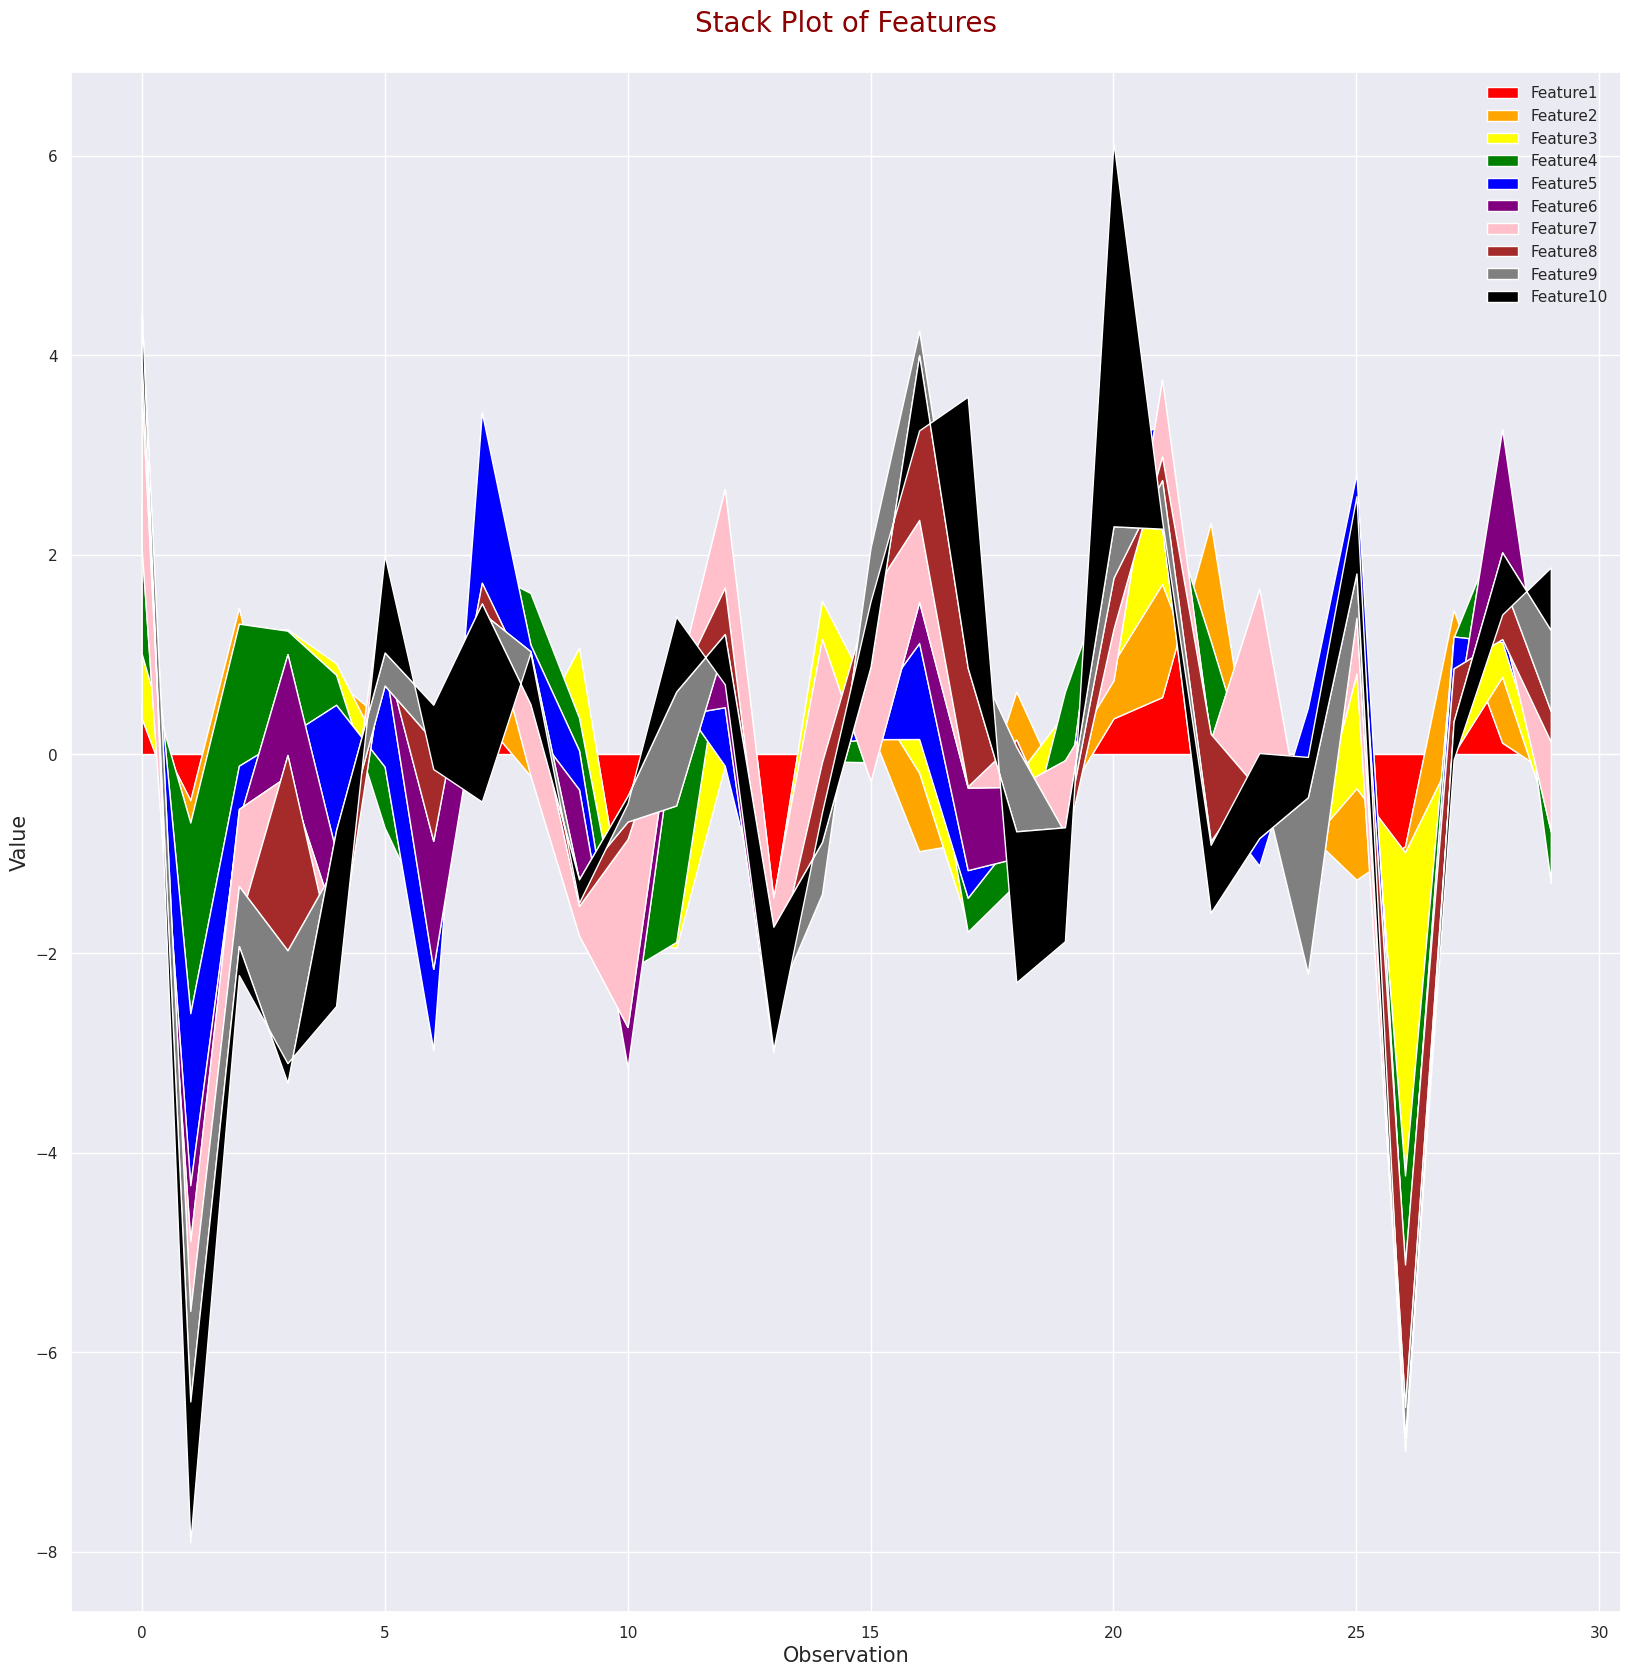

In [189]:

my_data=data.head(30)
my_color = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'brown', 'gray', 'black']

# Create a stack plot
plt.figure(figsize=(20,20))
plt.stackplot(my_data.index, my_data.values.T, labels=my_data.columns,colors=my_color)

# Add a legend and labels
plt.legend(loc="best")
plt.xlabel("Observation",fontsize=15)
plt.ylabel("Value",fontsize=15)
plt.title("Stack Plot of Features\n",color="darkred",fontsize=20)

# Show the plot
plt.show() 


* Stackplots are generated by plotting different datasets vertically on top of one another rather than overlapping with one another.

* Stackplot is used to draw a stacked area plot. It displays the complete data for visualization. It shows each part stacked onto one another and how each part makes the complete figure. It displays various constituents of data and it behaves like a pie chart. It has x-label, y-label, and title in which various parts can be represented by different colors. 

# Task 03 (Linear Regression)

# a. Take 5 numerical feature from the main dataset. Select 4 features as independent variable, 1 feature as dependent variable. Find basic statistics of the features.

# Read Main Data

In [190]:
df=pd.read_csv("/kaggle/input/nutritions-us-new/Nutritions_US_new.csv")

In [191]:
df.head()

,Unnamed: 0,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),...,Vit_D_IU,Vit_K_(�g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2
0,0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,...,0.0,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp
1,1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,...,0.0,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp
2,2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,...,0.0,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup
3,3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,...,21.0,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch
4,4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,...,22.0,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded"


# Select Five Features

In [192]:
new_feature= ['Water_(g)', 'Protein_(g)', 'Lipid_Tot_(g)', 'Carbohydrt_(g)','Energ_Kcal']


# Set 4 features as independent variable (X_data) and 1 feature as dependent variable (Y_data)

In [193]:
X_data=df[new_feature[: 4]]
Y_data=df[new_feature[-1]]

# Find Basic Statistics of the Features

In [194]:

print(f"Basic Statics of X Feature is :\n\n {X_data.describe()}")


Basic Statics of X Feature is :

          Water_(g)  Protein_(g)  Lipid_Tot_(g)  Carbohydrt_(g)
count  8790.000000  8790.000000    8790.000000     8790.000000
mean     54.112218    11.342849      10.553725       22.127710
std      30.771103    10.530474      15.814842       27.270822
min       0.000000     0.000000       0.000000        0.000000
25%      29.717500     2.380000       0.950000        0.050000
50%      63.080000     8.000000       5.140000        9.340000
75%      77.960000    19.880000      13.720000       34.910000
max     100.000000    88.320000     100.000000      100.000000


In [195]:

print(f"Basic Statics of Y Feature is :\n\n {Y_data.describe()}")

Basic Statics of Y Feature is :

 count    8790.000000
mean      226.317634
std       169.877539
min         0.000000
25%        91.000000
50%       191.000000
75%       337.000000
max       902.000000
Name: Energ_Kcal, dtype: float64


# b. Perform a linear regression of the dataset, find beta values, write down the linear equation.

In [196]:
ln_model=LinearRegression()
ln_model.fit(X_data,Y_data)
betas = ln_model.coef_
print("Linear Regression Model Beta Values :\n",betas)

Linear Regression Model Beta Values :
 [-1.02627809  2.93449067  7.79482057  2.73971488]


# write down the linear equation.

In [197]:
# Add the intercept term to the beta values
beta_intercept= ln_model.intercept_
beta_insert = np.insert(betas, 0, beta_intercept)

# Create a list of term strings for each independent variable using a list comprehension
term_strings = [f"({beta:.2f})*x{i}" for i, beta in enumerate(beta_insert)]

# Join the term strings together using " + " as the separator and concatenate with "y = "
linear_eqn = "y = " + " + ".join(term_strings)

# Print the resulting linear equation string
print("Linear Equation: ", linear_eqn)

Linear Equation:  y = (105.68)*x0 + (-1.03)*x1 + (2.93)*x2 + (7.79)*x3 + (2.74)*x4


# Another Way Using Ordinary Least Squares (OLS)

In [198]:

# Perform linear regression
X = sm.add_constant(X_data) # add constant term to X_data
model = sm.OLS(Y_data,X).fit() 
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Energ_Kcal   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.198e+05
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:19:52   Log-Likelihood:                -37322.
No. Observations:                8790   AIC:                         7.465e+04
Df Residuals:                    8785   BIC:                         7.469e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            105.6783      4.997     21.148      0.000      95.883     115.474
Water_(g)         -1.0263      0.050    -20.326      0.000      -1.125      -0.927
Protein_(g)        2.9345      0.054     54.045      0.000       2.828       3.041
Lipid_Tot_(g)      7.7948      0.052    151.097      0.000       7.694       7.896
Carbohydrt_(g)     2.7397      0.052     52.704      0.000       2.638       2.842
==============================================================================
Omnibus:                     3818.059   Durbin-Watson:                   1.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2360458.159
Skew:                          -0.654   Prob(JB):                         0.00
Kurtosis:                      83.270   Cond. No.                     1.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [199]:
beta_value = model.params # get beta coefficients
print('Second Method Beta Values:\n\n', beta_value)


Second Method Beta Values:

 const             105.678327
Water_(g)          -1.026278
Protein_(g)         2.934491
Lipid_Tot_(g)       7.794821
Carbohydrt_(g)      2.739715
dtype: float64


# write down the linear equation.

In [200]:
# The linear equation is: y = b0 + b1*x1 + b2*x2 + b3*x3 + b4*x4
# where b0 is the intercept, and b1, b2, b3, b4 are the beta values
intercept = model.params[0]
betas = model.params[1:]

print("Linear equation: y = ", intercept, " + ", " + ".join([f"{beta}*x{i}" for i, beta in enumerate(betas, 1)]))


Linear equation: y =  105.67832709069818  +  -1.0262780931548916*x1 + 2.9344906697393442*x2 + 7.794820573949189*x3 + 2.739714879007806*x4


# c. Find r square value, MSE, RMSE value. Interpret the features

### Root Mean Square Error (RMSE)

* **Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.**

### R2 Score
* **R2 is a measure of the goodness of fit of a model. In regression, the R2 coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An R2 of 1 indicates that the regression predictions perfectly fit the data.**

### Mean Squared Error

* **The Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of error squares.the average squared difference between the estimated values and true value. It is a risk function, corresponding to the expected value of the squared error loss. It is always non – negative and values close to zero are better. The MSE is the second moment of the error (about the origin) and thus incorporates both the variance of the estimator and its bias.**

In [201]:
y_pred = ln_model.predict(X_data)
r2 = r2_score(Y_data, y_pred)
mse = mean_squared_error(Y_data, y_pred)
rmse = np.sqrt(mse)
print("R2 value is :", r2)
print("Mean Squared Error is :", mse)
print("Root Mean Squared Error :", rmse)

R2 value is : 0.9901070660478395
Mean Squared Error is : 285.46155140070215
Root Mean Squared Error : 16.895607458765788


## R2_Score
### The R-squared value of 0.9901070660478395 indicates that the independent variables in the linear regression model explain 99.01% of the variability in the dependent variable. This is a high value, and it suggests that the model fits the data well.

## Mean Squared Error
### The Mean Squared Error (MSE) of 285.46155140070215 measures the average squared difference between the actual values of the dependent variable and the predicted values of the dependent variable. 

## Root Mean Squared Error

### The Root Mean Squared Error (RMSE) of 16.895607458765788 is the square root of the MSE and has the same units as the dependent variable. In this case, it suggests that the typical magnitude of the errors made by the model is around 16.9 units of the dependent variable. This is a relatively small value compared to the range of the dependent variable, which suggests that the model is making good predictions overall.

![](https://i.pinimg.com/originals/9d/70/21/9d70219a6d25fa56d771af6a393a26b7.gif)